In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

import time

import agent

In [2]:
a = agent.agent()
a.client.reload_world()
time.sleep(2)
d = a.world.debug

In [3]:
a.spawn_vehicle(1)
a.vehicle.set_autopilot(True)

 Vehicle model : harley-davidson low_rider
 Spawning vehicle at location : 65, 7, 0 (spawn point no. 1)


In [4]:
a.spawn_rgbcam()

In [5]:
images = []
fin = False

In [6]:
def img_callback(data):
    global fin
    
    if(fin):
        return

    global images
    
    if(len(images) > 501):
        fin = True
    else:
        array = np.frombuffer(data.raw_data, dtype=np.dtype("uint8"))
        array = np.reshape(array, (data.height, data.width, 4))
        array = array[:, :, :3]
        array = array[:, :, ::-1]

        images.append(array.copy())

In [7]:
a.rgbcam_reg_callback(img_callback)

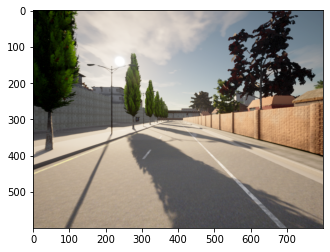

In [9]:
data = a.rgbcam_data
array = np.frombuffer(data.raw_data, dtype=np.dtype("uint8"))
array = np.reshape(array, (data.height, data.width, 4))
array = array[:, :, :3]
array = array[:, :, ::-1]

array.shape
plt.imshow(array)

In [11]:
print(a.vehicle.get_location().x, a.vehicle.get_location().y)
print(len(images))

159.6104736328125 8.983582496643066
177


In [ ]:
# Select 2 images
idx = 100
img1 = images[idx-2].copy()
img2 = images[idx].copy()

plt.figure(figsize=(150,100))
plt.subplot(1,2,1)
plt.title('Original image 1')
plt.imshow(img1)
plt.subplot(1,2,2)
plt.title('Original image 2')
plt.imshow(img2)
plt.show()
# Convert to grayscale
gray1  = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2  = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(150,100))
plt.subplot(1,2,1)
plt.title('Grayscale image 1')
plt.imshow(gray1, cmap='gray')
plt.subplot(1,2,2)
plt.title('Grayscale image 2')
plt.imshow(gray2, cmap='gray')
plt.show()

# Find ORB features
det   = cv2.ORB_create()
kp1, des1 = det.detectAndCompute(gray1, None)
kp2, des2 = det.detectAndCompute(gray2, None)

out1   = None
out1   = cv2.drawKeypoints(gray1, kp1, out1)
out2   = None
out2   = cv2.drawKeypoints(gray2, kp2, out2)
plt.figure(figsize=(150,100))
plt.subplot(1,2,1)
plt.title("Keypoints in image 1")
plt.imshow(out1)
plt.subplot(1,2,2)
plt.title("Keypoints in image 2")
plt.imshow(out2)
plt.show()

# Match features
bf = cv2.BFMatcher_create()
matches = bf.match(des1, des2)

plt.figure(figsize=(300,100))
filtered_matches = matches[:30] if len(matches) > 30 else matches
plt.imshow(cv2.drawMatches(img1,kp1,img2,kp2,filtered_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
plt.show()

In [ ]:
img3 = img1.copy()
mask = np.zeros_like(img3)
color = (0, 255, 0)

filtered_matches = matches.sort(key= lambda x : x.distance)
for m in matches[:20]:
    point1 = map(int, kp1[m.queryIdx].pt)
    point2 = map(int, kp2[m.trainIdx].pt)
    print(m.distance)
    
    if(m.distance < 250):
        mask = cv2.line(mask, tuple(point1), tuple(point2), color, 2)
        
plt.figure(figsize=(150, 100))
plt.imshow(cv2.add(mask, img3))
plt.show()